In [36]:
using Plots

In [37]:
using NBInclude

In [38]:
@nbinclude("../L1/List1.ipynb");

In [39]:
epsil(2)

51

# Zad 1

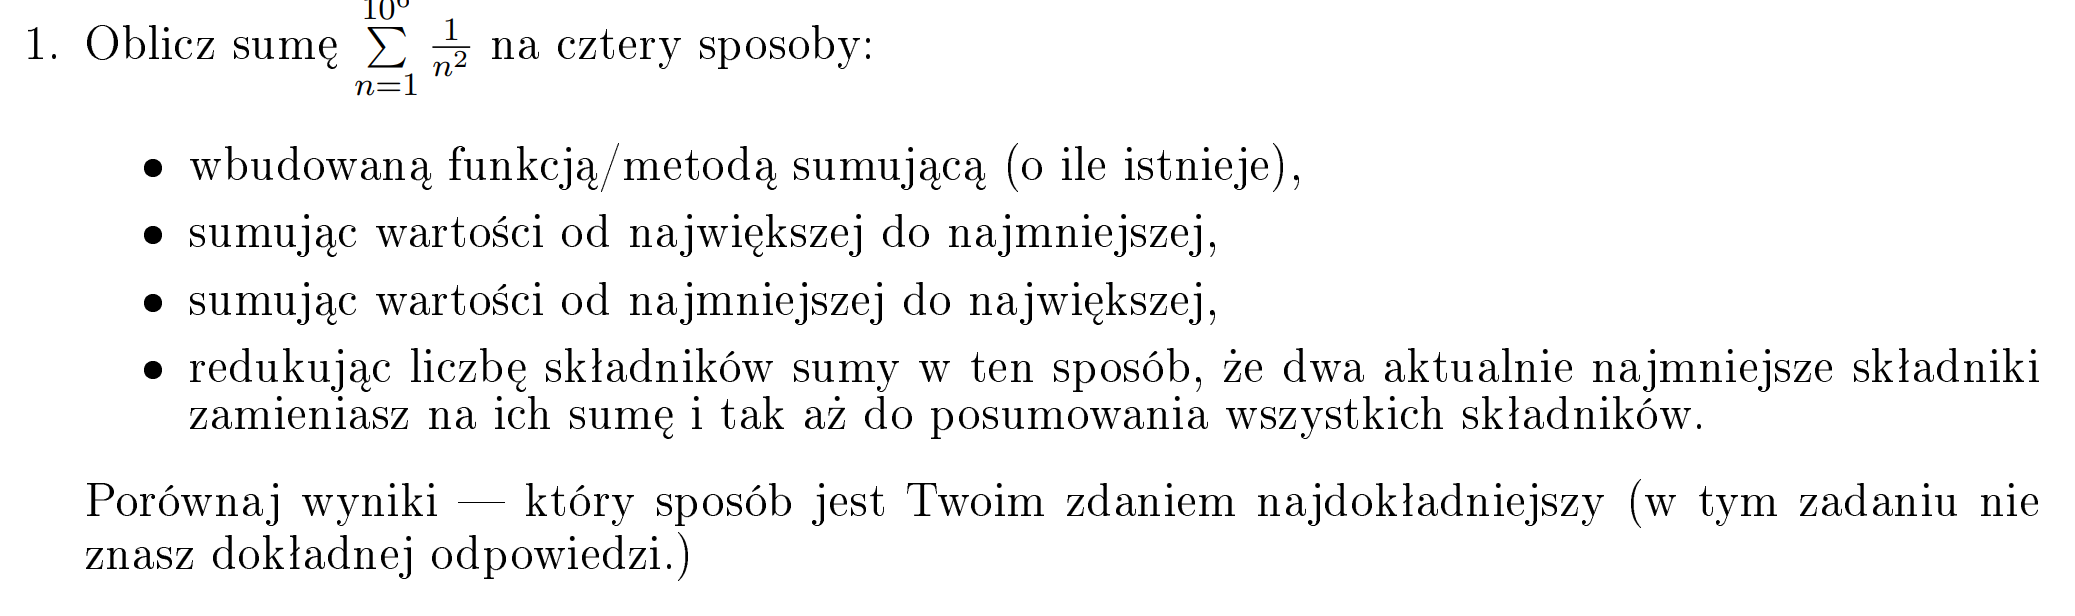

In [40]:
f(n)=1/n^2

f (generic function with 1 method)

In [41]:
N=10^6

1000000

In [42]:
2. ^-epsil(π^2/6)

1.1102230246251565e-16

In [43]:
method₁(;N=N,f=f)=begin
    sum(f(i) for i in 1:N)
end

method₁ (generic function with 1 method)

In [44]:
@time π^2/6-method₁()

  0.024350 seconds (81.71 k allocations: 3.976 MiB, 95.82% compilation time)


9.999994563525405e-7

In [45]:
method₂(;N=N,f=f)=begin
    tmp=0
    for i in 1:N
        tmp+=f(i)
    end
    tmp
end

method₂ (generic function with 1 method)

In [46]:
method₃(;N=N,f=f)=begin
    tmp=0
    for i in N:-1:1
        tmp+=f(i)
    end
    tmp
end

method₃ (generic function with 1 method)

In [47]:
@time π^2/6-method₂()

  0.009011 seconds (4.42 k allocations: 218.344 KiB, 88.66% compilation time)


9.999994563525405e-7

In [48]:
@time π^2/6-method₃()

  0.011458 seconds (6.23 k allocations: 327.625 KiB, 91.05% compilation time)


9.999995000953277e-7

In [49]:
epsil(π^2/6) #≈1e-16

53

In [50]:
@time π^2/6-method₁(N=10^9)

  1.013461 seconds


9.013651380840315e-9

In [51]:
@time π^2/6-method₂(N=10^9)

  0.998259 seconds


9.013651380840315e-9

In [52]:
@time π^2/6-method₃(N=10^9)

  0.997690 seconds


1.000000082740371e-9

In [53]:
insert_and_dedup!(v::Vector, x) = (splice!(v, searchsorted(v,x), [x]); v)

insert_and_dedup! (generic function with 1 method)

In [54]:
method₄(;N=N,f=f)=begin
    X=[f(i) for i in N:-1:1]
    while length(X)>1
        tmp=popfirst!(X)+popfirst!(X)
        insert_and_dedup!(X,tmp)
    end
    X[1]
end

method₄ (generic function with 1 method)

In [55]:
using DataStructures

In [56]:
method₄v2(;N=N,f=f)=begin
    X=SortedSet([f(i) for i in N:-1:1])
    while length(X)>1
        tmp=pop!(X)+pop!(X)
        push!(X,tmp)
    end
    pop!(X)
end

method₄v2 (generic function with 1 method)

In [57]:
@time method₄(N=2^10)

  0.000135 seconds (3.08 k allocations: 129.031 KiB)


1.643957981030164

In [58]:
@time method₄(N=2^11)

  0.000341 seconds (6.15 k allocations: 258.031 KiB)


1.6444459047881135

In [59]:
@time method₄(N=2^12)

  0.000826 seconds (12.29 k allocations: 516.031 KiB)


1.6446899560231234

In [60]:
@time method₄(N=2^13)

  0.002593 seconds (24.58 k allocations: 1.008 MiB)


1.644812003986004

In [61]:
@time method₄(N=2^14)

  0.010288 seconds (49.16 k allocations: 2.016 MiB)


1.6448730335545836

In [62]:
@time method₄(N=2^15)

  0.040592 seconds (98.31 k allocations: 4.031 MiB)


1.644903549735758

In [63]:
@time method₄(N=2^16)

  0.154939 seconds (196.61 k allocations: 7.563 MiB)


1.6449188081755786

In [64]:
@time method₄(N=2^17)

  1.713443 seconds (393.22 k allocations: 15.125 MiB, 0.31% gc time)


1.644926437482799

In [65]:
@time method₄v2(N=2^18)

  0.084185 seconds (106 allocations: 42.023 MiB, 6.87% gc time)


1.6449302521582367

In [66]:
@time method₄v2(N=2^19)

  0.302027 seconds (114 allocations: 88.359 MiB, 47.25% gc time)


1.6449321595014126

In [67]:
@time method₄v2(N=2^20)

  0.608732 seconds (124 allocations: 182.437 MiB, 41.91% gc time)


1.6449331131743647

In [68]:
@time π^2/6-method₄v2()

  0.522630 seconds (126 allocations: 182.066 MiB, 28.15% gc time)


9.99999499873283e-7

In [69]:
@time π^2/6-method₄v2(N=10^7)

  4.375680 seconds (162 allocations: 2.919 GiB, 13.52% gc time)


9.99999949513608e-8

# Zad 2

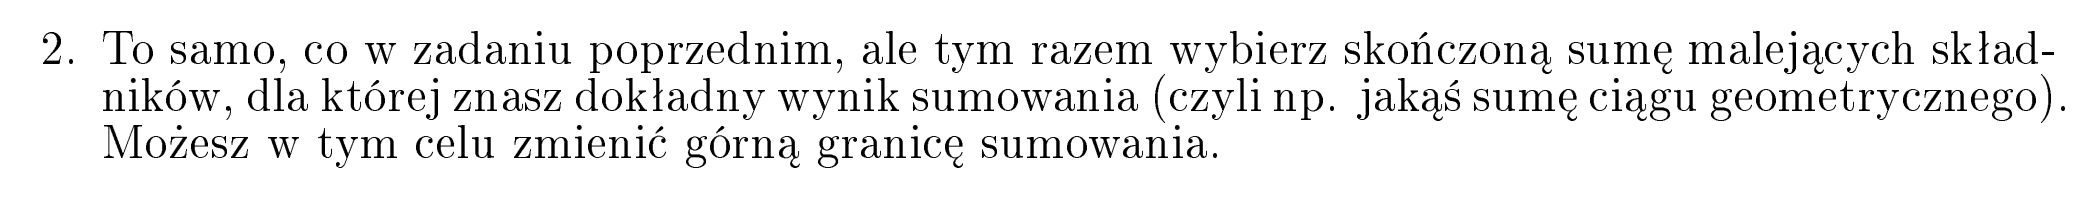

In [70]:
genom(q) = n-> q^n

genom (generic function with 1 method)

In [71]:
sinom(x) = n-> sin(n*x)

sinom (generic function with 1 method)

In [72]:
genom_sum(;q,N=N)=q*(1-q^n)/(1-q)

genom_sum (generic function with 1 method)

In [73]:
sinom_sum(;x,N=N)=sin(N*x/2)*sin((N+1)*x/2)/sin(x/2)

sinom_sum (generic function with 1 method)

In [74]:
1000000-method₁(f=genom(1))

0

In [75]:
q=1/2
genom_sum(q=q)-method₁(f=genom(q)) |> println
genom_sum(q=q)-method₂(f=genom(q)) |> println
genom_sum(q=q)-method₃(f=genom(q)) |> println
genom_sum(q=q)-method₄v2(f=genom(q)) |> println

0.0
0.0
0.0
3.552713678800501e-15


In [76]:
q=1/5
genom_sum(q=q)-method₁(f=genom(q)) |> println
genom_sum(q=q)-method₂(f=genom(q)) |> println
genom_sum(q=q)-method₃(f=genom(q)) |> println
genom_sum(q=q)-method₄v2(f=genom(q)) |> println

-1.1102230246251565e-16
-1.1102230246251565e-16
0.0
0.0


In [77]:
q=7/9
genom_sum(q=q)-method₁(f=genom(q)) |> println
genom_sum(q=q)-method₂(f=genom(q)) |> println
genom_sum(q=q)-method₃(f=genom(q)) |> println
genom_sum(q=q)-method₄v2(f=genom(q)) |> println

-3.182560881498375e-10
-3.182560881498375e-10
-3.182560881498375e-10
-3.182560881498375e-10


In [78]:
q=3/9
genom_sum(q=q)-method₁(f=genom(q)) |> println
genom_sum(q=q)-method₂(f=genom(q)) |> println
genom_sum(q=q)-method₃(f=genom(q)) |> println
genom_sum(q=q)-method₄v2(f=genom(q)) |> println

1.1102230246251565e-16
1.1102230246251565e-16
-5.551115123125783e-17
-5.551115123125783e-17


In [79]:
q=3/9
N=10^7
genom_sum(q=q,N=N)-method₁(f=genom(q),N=N) |> println
genom_sum(q=q,N=N)-method₂(f=genom(q),N=N) |> println
genom_sum(q=q,N=N)-method₃(f=genom(q),N=N) |> println
genom_sum(q=q,N=N)-method₄v2(f=genom(q),N=N) |> println

1.1102230246251565e-16
1.1102230246251565e-16
-5.551115123125783e-17
-5.551115123125783e-17


In [80]:
q=3/9
N=10^2
genom_sum(q=q,N=N)-method₁(f=genom(q),N=N) |> println
genom_sum(q=q,N=N)-method₂(f=genom(q),N=N) |> println
genom_sum(q=q,N=N)-method₃(f=genom(q),N=N) |> println
genom_sum(q=q,N=N)-method₄v2(f=genom(q),N=N) |> println

1.1102230246251565e-16
1.1102230246251565e-16
-5.551115123125783e-17
-5.551115123125783e-17


In [81]:
q=4/5
N=10^6
genom_sum(q=q,N=N)-method₁(f=genom(q),N=N) |> println
genom_sum(q=q,N=N)-method₂(f=genom(q),N=N) |> println
genom_sum(q=q,N=N)-method₃(f=genom(q),N=N) |> println
genom_sum(q=q,N=N)-method₄v2(f=genom(q),N=N) |> println

-4.8566701771335374e-9
-4.8566701771335374e-9
-4.856671953490377e-9
-4.8566728416687965e-9


In [82]:
q=4/5
N=10^6
genom_sum(q=q,N=N)-method₁(f=genom(q),N=N) |> println
genom_sum(q=q,N=N)-method₂(f=genom(q),N=N) |> println
genom_sum(q=q,N=N)-method₃(f=genom(q),N=N) |> println
genom_sum(q=q,N=N)-method₄v2(f=genom(q),N=N) |> println

-4.8566701771335374e-9
-4.8566701771335374e-9
-4.856671953490377e-9
-4.8566728416687965e-9


In [83]:
x=4/5
N=10^6
sinom_sum(x=x,N=N)-method₁(f=sinom(x),N=N) |> println
sinom_sum(x=x,N=N)-method₂(f=sinom(x),N=N) |> println
sinom_sum(x=x,N=N)-method₃(f=sinom(x),N=N) |> println
sinom_sum(x=x,N=N)-method₄v2(f=sinom(x),N=N) |> println

1.0699011121495516e-10
1.0699011121495516e-10
1.0688053220242466e-10
-7.911577920571844e-9


In [84]:
x=1/3
N=10^6
sinom_sum(x=x,N=N)-method₁(f=sinom(x),N=N) |> println
sinom_sum(x=x,N=N)-method₂(f=sinom(x),N=N) |> println
sinom_sum(x=x,N=N)-method₃(f=sinom(x),N=N) |> println
sinom_sum(x=x,N=N)-method₄v2(f=sinom(x),N=N) |> println

5.2158277696889854e-11
5.2158277696889854e-11
5.24824628200804e-11
-1.5693932375882014e-8


In [85]:
x=1/2
N=10^6
sinom_sum(x=x,N=N)-method₁(f=sinom(x),N=N) |> println
sinom_sum(x=x,N=N)-method₂(f=sinom(x),N=N) |> println
sinom_sum(x=x,N=N)-method₃(f=sinom(x),N=N) |> println
sinom_sum(x=x,N=N)-method₄v2(f=sinom(x),N=N) |> println

-2.042810365310288e-14
-2.042810365310288e-14
-1.354472090042691e-13
-1.0459781041305405e-8


# Zad 3

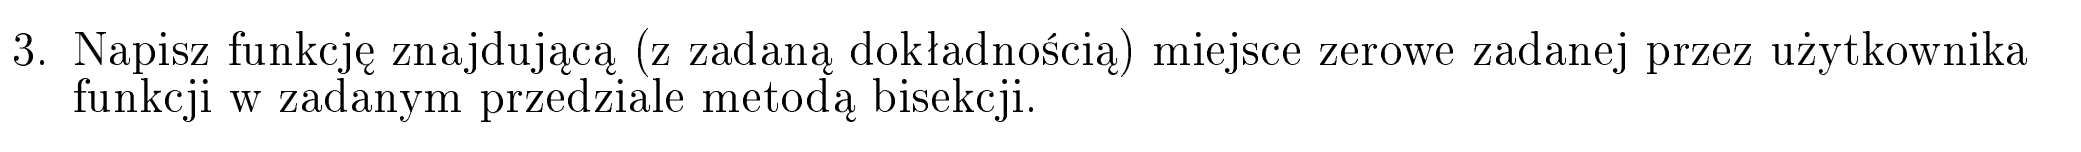

In [86]:
bisek(;f,a,b,ε=NaN,δ=NaN)=begin
    if !xor(ε===NaN, δ===NaN)
        error("Algorytm potrzebuje dokładnie jednej wartości ze zbioru {ε, δ}!")
    end
    fa=f(a)
    fb=f(b)
    if fa*fb >0
        error("Funkcja na przegach przyjmuję ten sam znak!")
    end

    c=(b+a)/2
    fc=f(c)
    if δ===NaN
        while abs(fc)>ε
            if fa*fc <0
                b=c
            else
                a=c
            end
            c=(b+a)/2
            fc=f(c)
        end
    else
        while b-a>2*δ
            if fa*fc <0
                b=c
            else
                a=c
            end
            c=(b+a)/2
            fc=f(c)
        end
    end
    (c,f(c))
end

bisek (generic function with 1 method)

In [87]:
bisek(f=sin, a=-1, b=3/2, δ=1e-4)

(-1.52587890625e-5, -1.5258789061907882e-5)

In [88]:
bisek(f=sin, a=-1, b=3/2, ε=1e-6)

(-9.5367431640625e-7, -9.536743164061055e-7)

# Zad 4

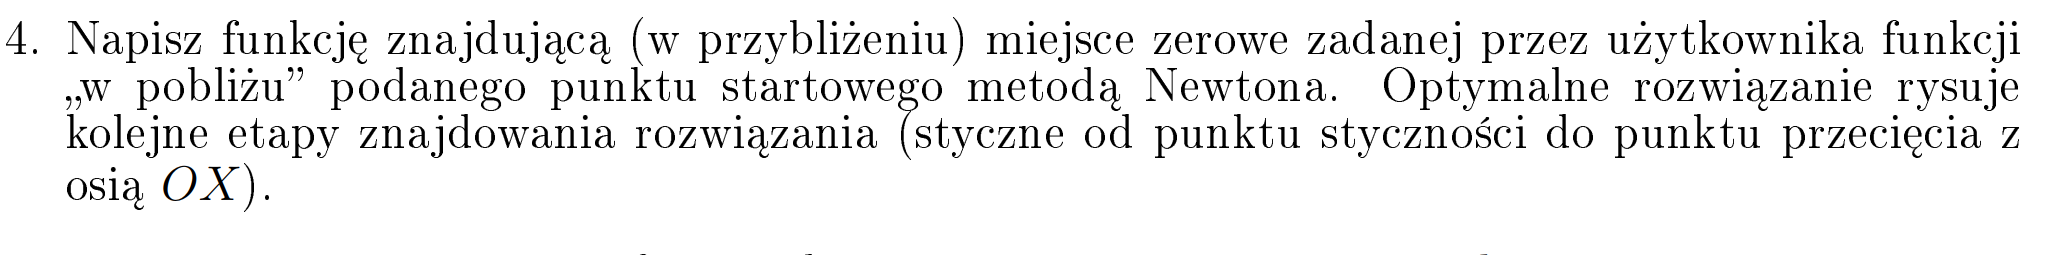

In [89]:
newton(;f,f′,x₀,ε)=begin
    x=[x₀]
    fx=[f(x₀)]
    while abs(fx[end])>ε
        push!(x,x[end]-fx[end]/f′(x[end]))
        push!(fx,f(x[end]))
    end
    [x[end],hcat(x,fx)]
end

newton (generic function with 1 method)

In [90]:
newton(f=x->sin(x), f′=x->-cos(x),x₀=0.1,ε=0.01)[1]

125.66914771594568

# Zad 5

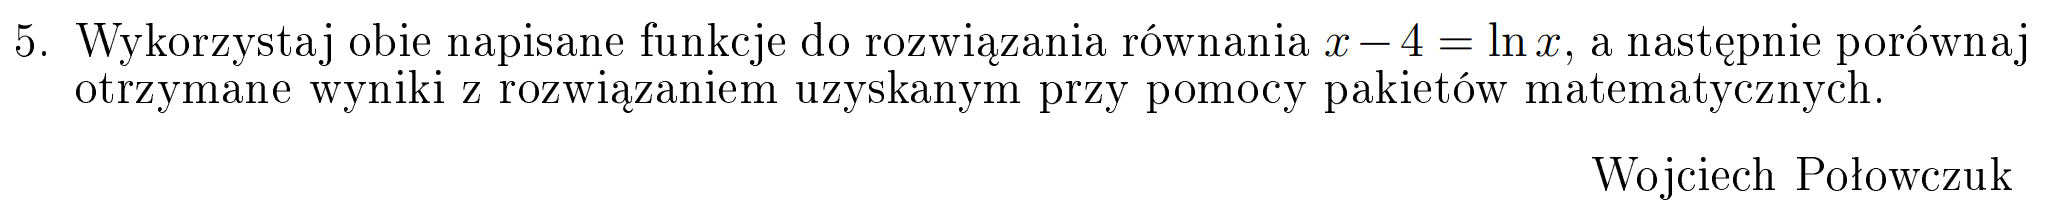

In [91]:
f_zerowe(x)=log(x)-x+4

f_zerowe (generic function with 1 method)

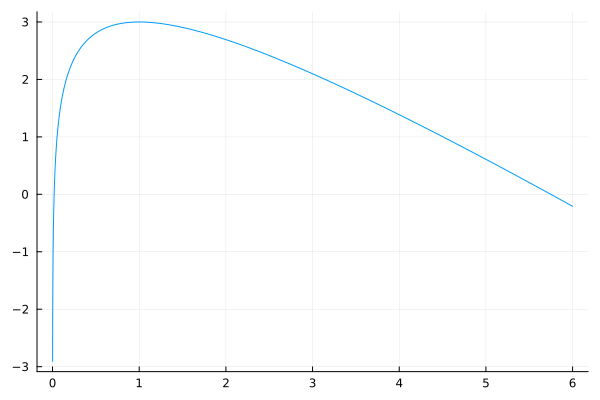

In [92]:
plot(0.001:0.001:6,f_zerowe, leg=false)

Ponieważ
$$ \lim\limits_{x\to\infty}\ln(x)-x+4=-\infty=\lim\limits_{x\to0}\ln(x)-x+4$$
oraz $\ln(1)-1+4=3>0$, to są przynajmniej 2 miejsca zerowe w prziedziale $(0,1)$ i $(1,\infty)$. W pierwszym przedziale $x$ jest mały, więc miejsce zerowe będzie w przyblizeniu w punkcie $x_1$, gdzie $\ln(x_1)=-4$, czyli $x_1\approx e^{-4}$.

Drugie miejsce zerowe:

$\ln(4)\approx 1.5$

$\ln(x)^\prime(4)=1/4$

$\frac{3}{4} z = 1.5 \iff z =2$

$x=4+2=6$

In [93]:
f_zerowe(exp(-4)/2)

-0.7023050000043121

In [94]:
f_zerowe(exp(-4)*2)

0.656515902782477

In [95]:
f_zerowe(5)

0.6094379124341005

In [98]:
f_zerowe(7)

-1.0540898509446865

In [97]:
bisek(f=f_zerowe,a=exp(-4)/2, b=exp(-4)*2, δ=2^-12)

(0.018816457139598005, 0.008160130558604095)

In [99]:
bisek(f=f_zerowe,a=5, b=7, δ=2^-12)

(5.749267578125, -0.00019510914636278187)

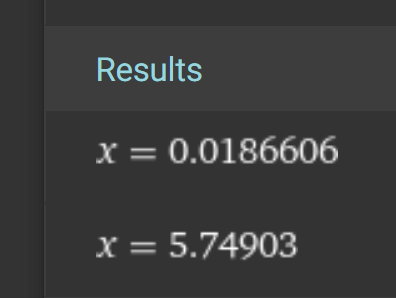

$f(x)=\ln(x)-x+4 \implies \frac{\partial}{\partial x}f^\prime(x) = \frac{1}{x} - 1$

In [101]:
newton(f=f_zerowe,x₀=exp(-4), ε=0.0001, f′=x->1/x-1)

2-element Vector{Any}:
 0.018660628796937168
  [0.01831563888873418 -0.01831563888873422; 0.018657360363774047 -0.00017191353788703623; 0.018660628796937168 -1.5342569881227064e-8]

In [103]:
newton(f=f_zerowe,x₀=6., ε=0.0001, f′=x->1/x-1)

2-element Vector{Any}:
 5.749031407366415
  [6.0 -0.2082405307719455; 5.750111363073666 -0.0008921409608815267; 5.749031407366415 -1.7639398386393168e-8]

In [217]:
newton(f=f_zerowe,x₀=3., ε=2. ^-20, f′=x->1/x-1)[2]

4×2 Matrix{Float64}:
 3.0       2.09861
 6.14792  -0.331805
 5.75166  -0.00217098
 5.74903  -1.04405e-7

In [171]:
f′(x)=1/x-1

f′ (generic function with 1 method)

In [172]:
4(length(tmp[:,1])-1)

20

In [218]:
tmp = newton(f=f_zerowe,x₀=3., ε=2. ^-20, f′=x->1/x-1)[2]
#plt1=plot(1. :0.01:8., f_zerowe, leg=false);
anim=@animate for i in 0:4(length(tmp[:,1]))-2
    plot(0.01 :0.01:8., f_zerowe, leg=false, ylim=[-2.1,4.5], framestyle=:origin);
    x_tmp=tmp[round(Int,i÷4+1),1]
    f_tmp=tmp[round(Int,i÷4+1),2]
    fp_tmp=f′(x_tmp)
    if i%4==0
        scatter!([x_tmp],[0],color=:red)
    elseif i%4==1
        scatter!([x_tmp],[0],color=:red)
        plot!([x_tmp,x_tmp],[0,f_tmp], color=:red, linestyle=:dash)
        scatter!([x_tmp],[f_tmp],color=:red)
    elseif i%4==2
        scatter!([x_tmp],[f_tmp],color=:red)
        plot!([1,8],[fp_tmp*(1-x_tmp)+f_tmp,fp_tmp*(8-x_tmp)+f_tmp])
    elseif i%4==3
        scatter!([x_tmp],[f_tmp],color=:red)
        plot!([1,8],[fp_tmp*(1-x_tmp)+f_tmp,fp_tmp*(8-x_tmp)+f_tmp])
        scatter!([tmp[round(Int,(i-3)/4+2),1]],[0],color=:red)
    end
    plt1=plot!()

    plot(0.01 :0.01:8., f_zerowe, leg=false, ylim=[-2.1,4.5], framestyle=:origin);
    if i%4==0
        scatter!([x_tmp],[0],color=:red)
    elseif i%4==1
        scatter!([x_tmp],[0],color=:red)
        plot!([x_tmp,x_tmp],[0,f_tmp], color=:red, linestyle=:dash)
        scatter!([x_tmp],[f_tmp],color=:red)
    elseif i%4==2
        scatter!([x_tmp],[f_tmp],color=:red)
        plot!([1,8],[fp_tmp*(1-x_tmp)+f_tmp,fp_tmp*(8-x_tmp)+f_tmp])
    elseif i%4==3
        scatter!([x_tmp],[f_tmp],color=:red)
        plot!([1,8],[fp_tmp*(1-x_tmp)+f_tmp,fp_tmp*(8-x_tmp)+f_tmp])
        scatter!([tmp[round(Int,(i-3)/4+2),1]],[0],color=:red)
    end
    plt2=plot!(xlim=[5.5,6.25], ylim=[-0.5,0.5])
    plot(plt1,plt2)
end

Animation("C:\\Users\\kacpe\\AppData\\Local\\Temp\\jl_FEHjN5", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png", "000011.png", "000012.png", "000013.png", "000014.png", "000015.png"])

[ Info: Saved animation to C:\Users\kacpe\Documents\GitHub\Numeryczne-Teoretyczne\L2\tmp.gif


Plots.AnimatedGif("C:\\Users\\kacpe\\Documents\\GitHub\\Numeryczne-Teoretyczne\\L2\\tmp.gif")
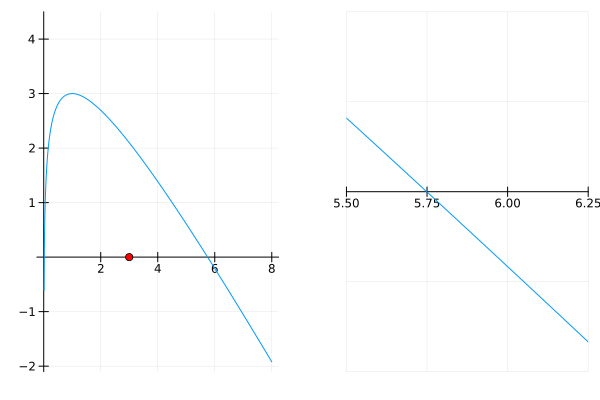

In [219]:
gif(anim, fps=1)